In [62]:
import uproot
import awkward as ak
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import mplhep

mplhep.style.use(["LHCbTex2"])
input_tree = uproot.open(
    {
        "/work/cetin/LHCb/reco_tuner/data/tracking_losses_ntuple_B_BJpsi_def_selected.root": "Selected"
    }
)
array = input_tree.arrays()

array["dSlope_yEndT"] = array["ideal_state_9410_ty"] - array["ideal_state_770_ty"]
array["dSlope_yEndT_abs"] = abs(array["dSlope_yEndT"])

array["dSlope_xEndT"] = array["ideal_state_9410_tx"] - array["ideal_state_770_tx"]
array["dSlope_xEndT_abs"] = abs(array["dSlope_xEndT"])
array["x_EndT_abs"] = abs(array["ideal_state_9410_x"])
array["x_EndVelo_abs"] = abs(array["ideal_state_770_x"])

array["y_EndT_abs"] = abs(array["ideal_state_9410_y"])
array["y_EndVelo_abs"] = abs(array["ideal_state_770_y"])

array["z_mag_xEndT"] = (
    array["ideal_state_770_x"]
    - array["ideal_state_9410_x"]
    - array["ideal_state_770_tx"] * array["ideal_state_770_z"]
    + array["ideal_state_9410_tx"] * array["ideal_state_9410_z"]
) / array["dSlope_xEndT"]

array["z_mag_corr"] = array["z_mag_xEndT"] - array["match_zmag"]

sel_array = array[
    (array["z_mag_xEndT"] < 5700)
    & (array["z_mag_xEndT"] > 5000)
    # & (array["match_chi2"] < 5)
]

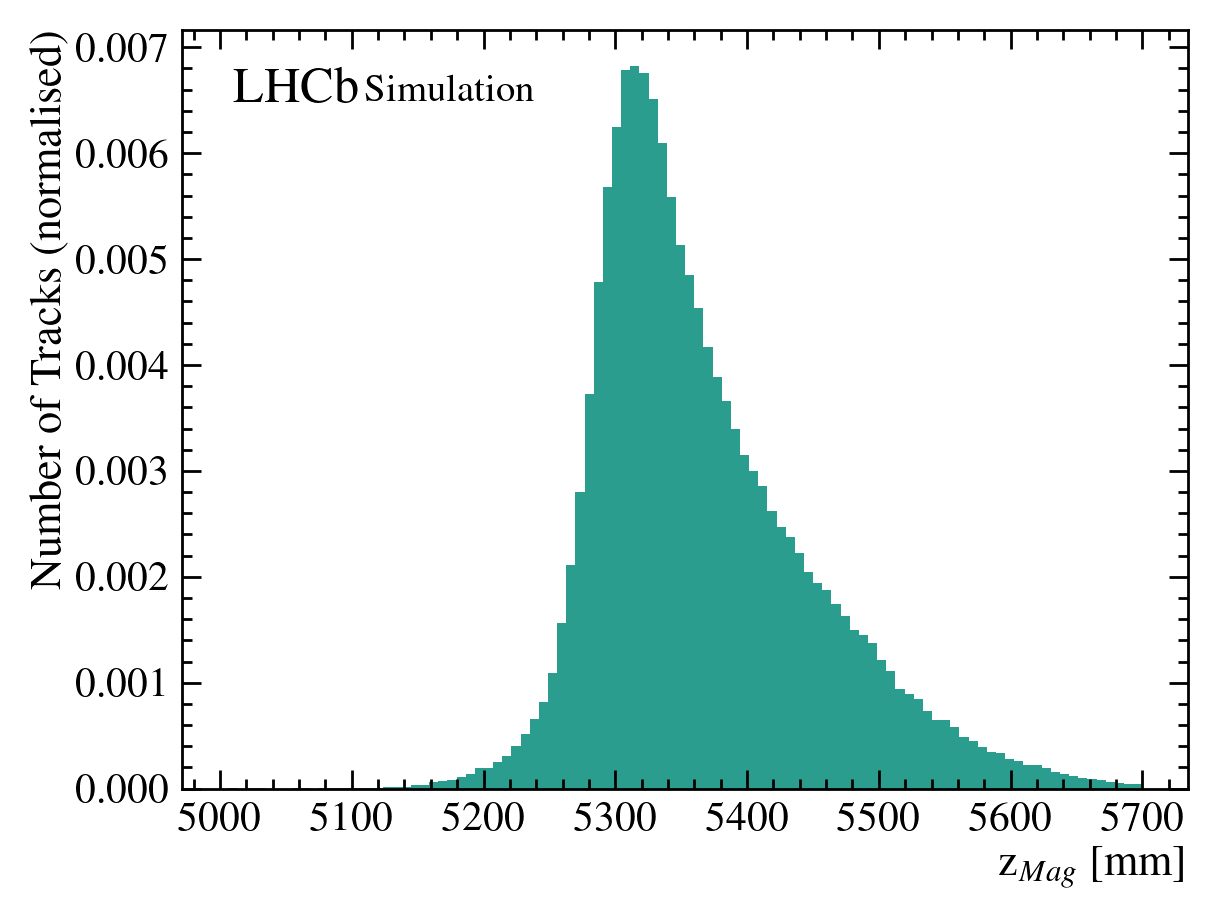

In [63]:
fig = plt.figure()
plt.hist(
    sel_array["z_mag_xEndT"],
    bins=100,
    # range=[5100, 5700],
    color="#2A9D8F",
    density=True,
)
plt.xlabel(r"z$_{Mag}$ [mm]")
plt.ylabel("Number of Tracks (normalised)")
mplhep.lhcb.text("Simulation")
plt.show()

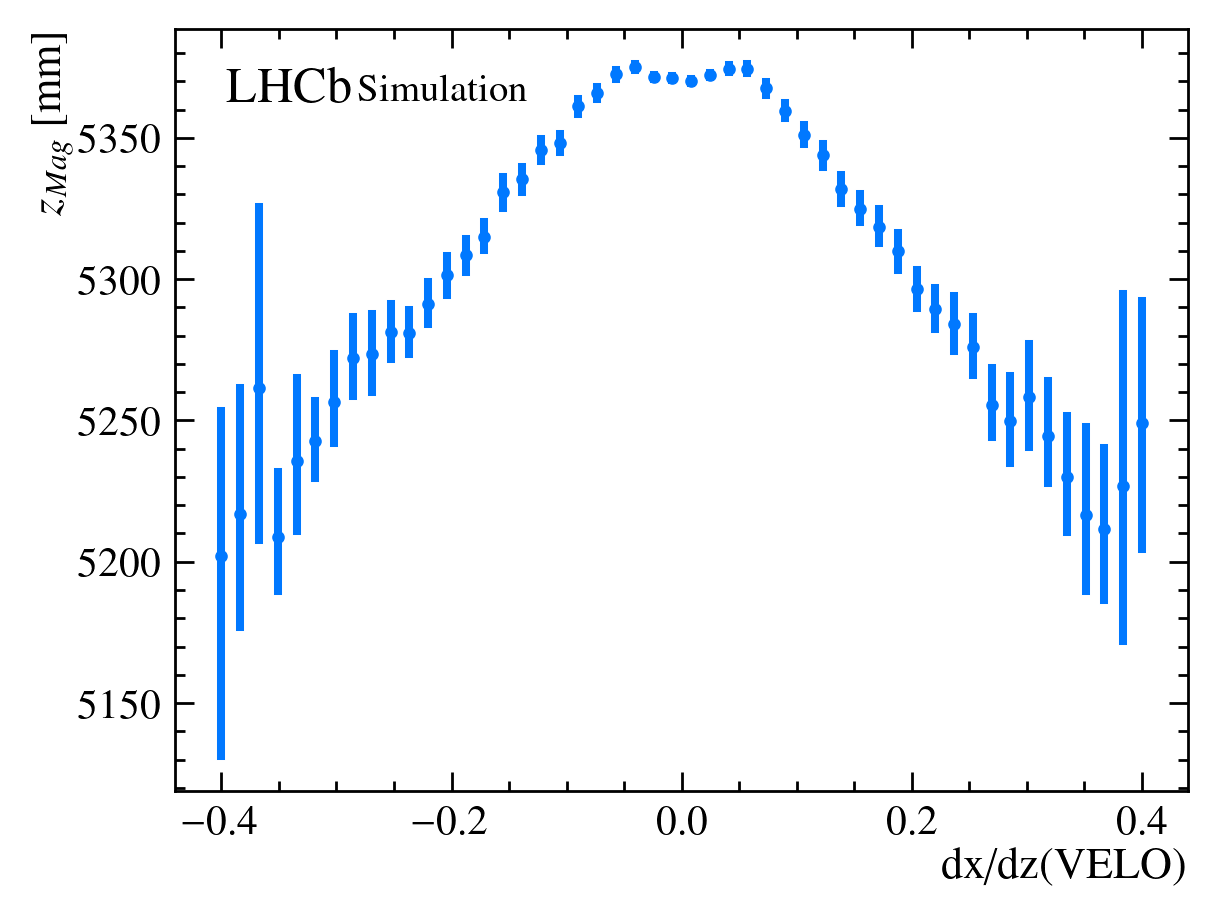

In [64]:
bins = np.linspace(-0.4, 0.4, 50)
sns.regplot(
    x=ak.to_numpy(sel_array["ideal_state_770_tx"]),
    y=ak.to_numpy(sel_array["z_mag_xEndT"]),
    x_bins=bins,
    fit_reg=None,
    x_estimator=np.mean,
)
# plt.ylim(5100, 5700)
plt.xlabel("dx/dz(VELO)")
plt.ylabel("$z_{Mag}$ [mm]")
mplhep.lhcb.text("Simulation")
plt.show()

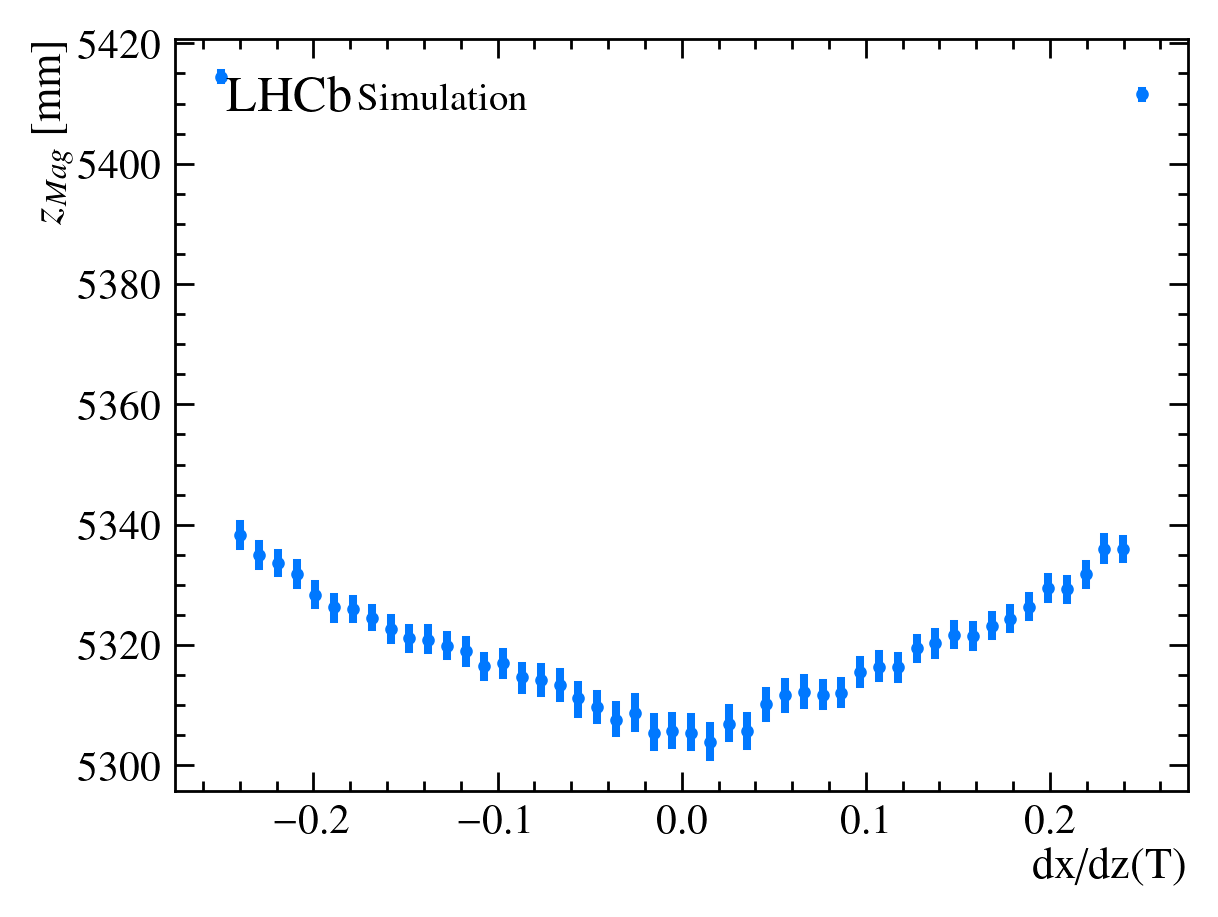

In [65]:
bins = np.linspace(-0.25, 0.25, 50)
sns.regplot(
    x=ak.to_numpy(sel_array["ideal_state_9410_tx"]),
    y=ak.to_numpy(sel_array["z_mag_xEndT"]),
    x_bins=bins,
    fit_reg=None,
    x_estimator=np.mean,
)
# plt.ylim(4500, 5700)

plt.xlabel("dx/dz(T)")
plt.ylabel("$z_{Mag}$ [mm]")
mplhep.lhcb.text("Simulation")
plt.show()

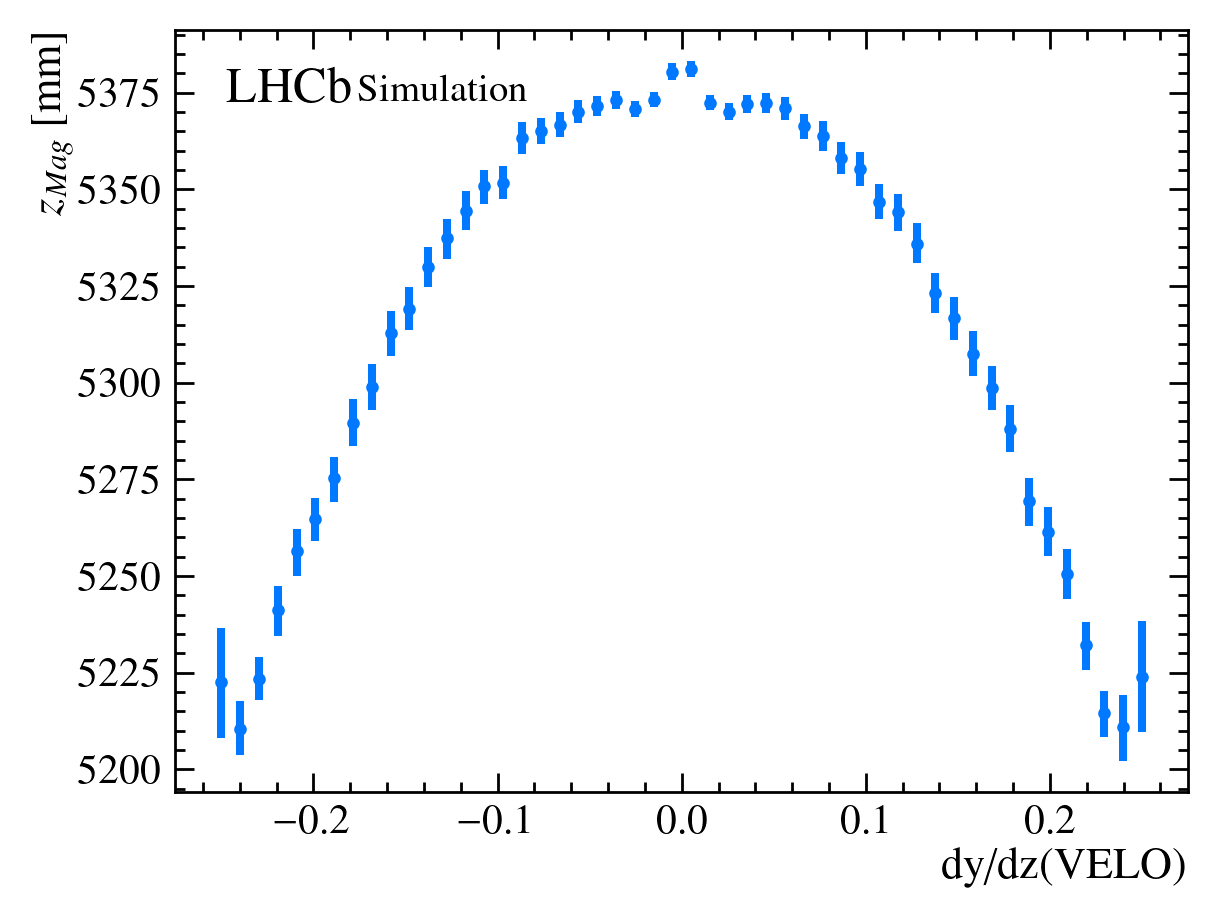

In [66]:
bins = np.linspace(-0.25, 0.25, 50)
sns.regplot(
    x=ak.to_numpy(sel_array["ideal_state_770_ty"]),
    y=ak.to_numpy(sel_array["z_mag_xEndT"]),
    x_bins=bins,
    fit_reg=None,
    x_estimator=np.mean,
)
# plt.ylim(4500, 5700)

plt.xlabel("dy/dz(VELO)")
plt.ylabel("$z_{Mag}$ [mm]")
mplhep.lhcb.text("Simulation")
plt.show()

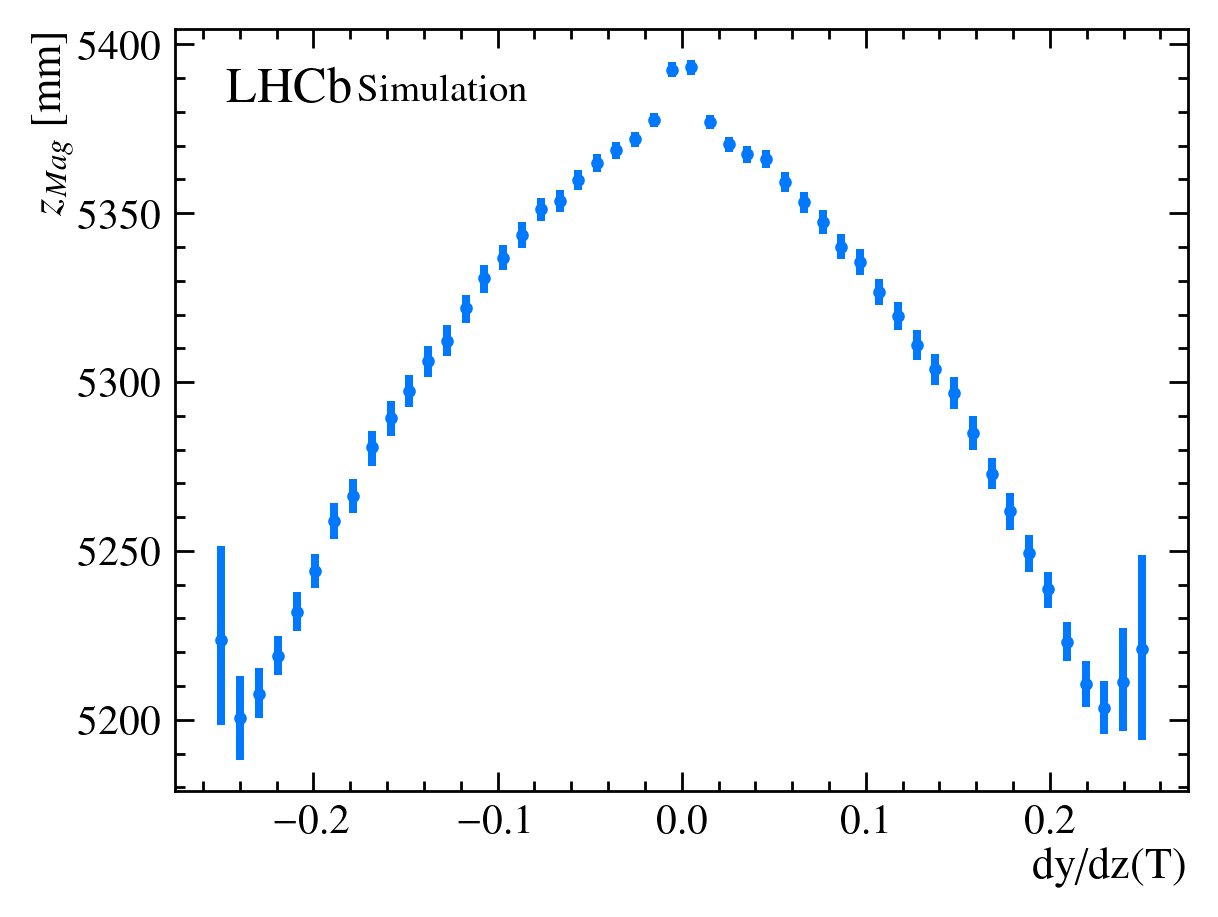

In [67]:
bins = np.linspace(-0.25, 0.25, 50)
sns.regplot(
    x=ak.to_numpy(sel_array["ideal_state_9410_ty"]),
    y=ak.to_numpy(sel_array["z_mag_xEndT"]),
    x_bins=bins,
    fit_reg=None,
    x_estimator=np.mean,
)
# plt.ylim(4500, 5700)

plt.xlabel("dy/dz(T)")
plt.ylabel("$z_{Mag}$ [mm]")
mplhep.lhcb.text("Simulation")
plt.show()

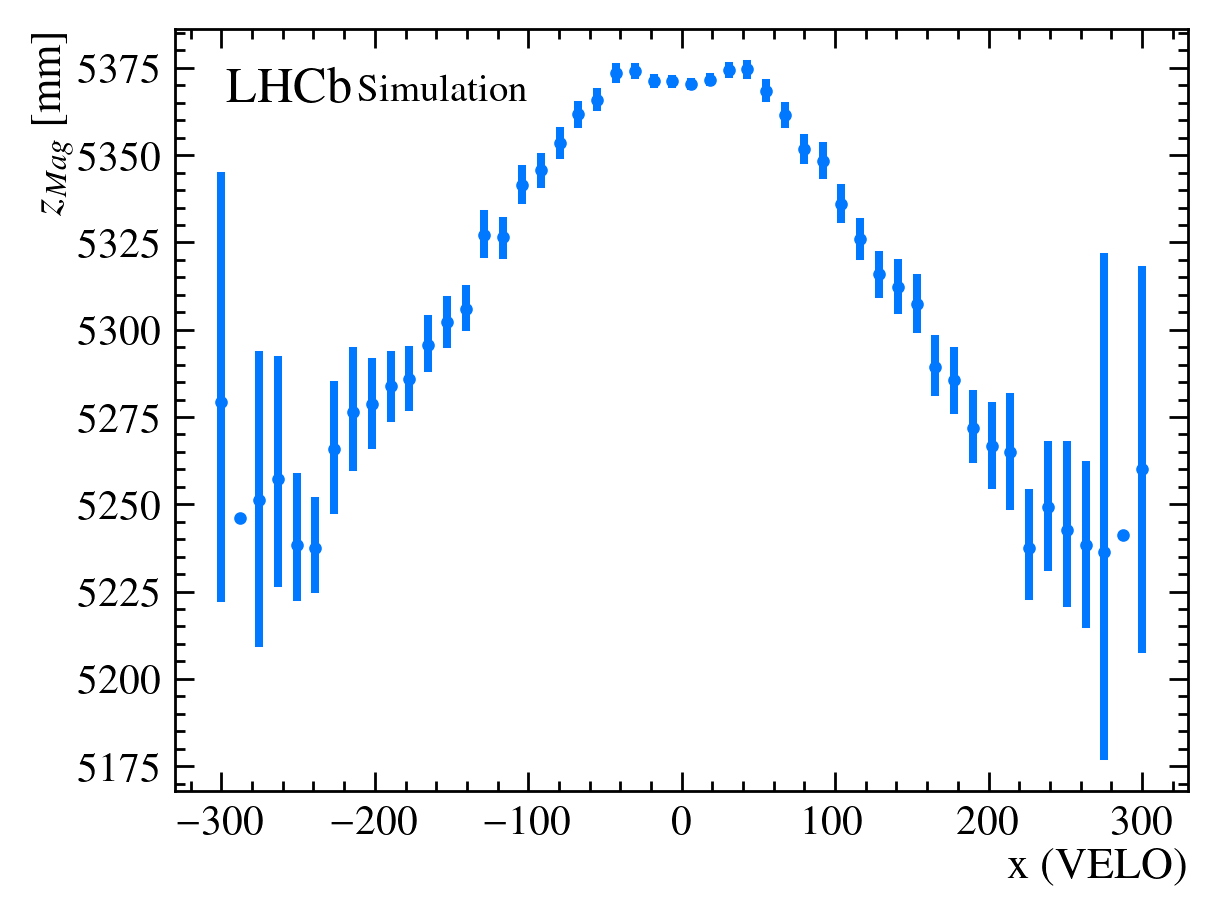

In [68]:
bins = np.linspace(-300, 300, 50)
sns.regplot(
    x=ak.to_numpy(sel_array["ideal_state_770_x"]),
    y=ak.to_numpy(sel_array["z_mag_xEndT"]),
    x_bins=bins,
    fit_reg=None,
    x_estimator=np.mean,
)
plt.xlabel("x (VELO)")
plt.ylabel("$z_{Mag}$ [mm]")
mplhep.lhcb.text("Simulation")
plt.show()

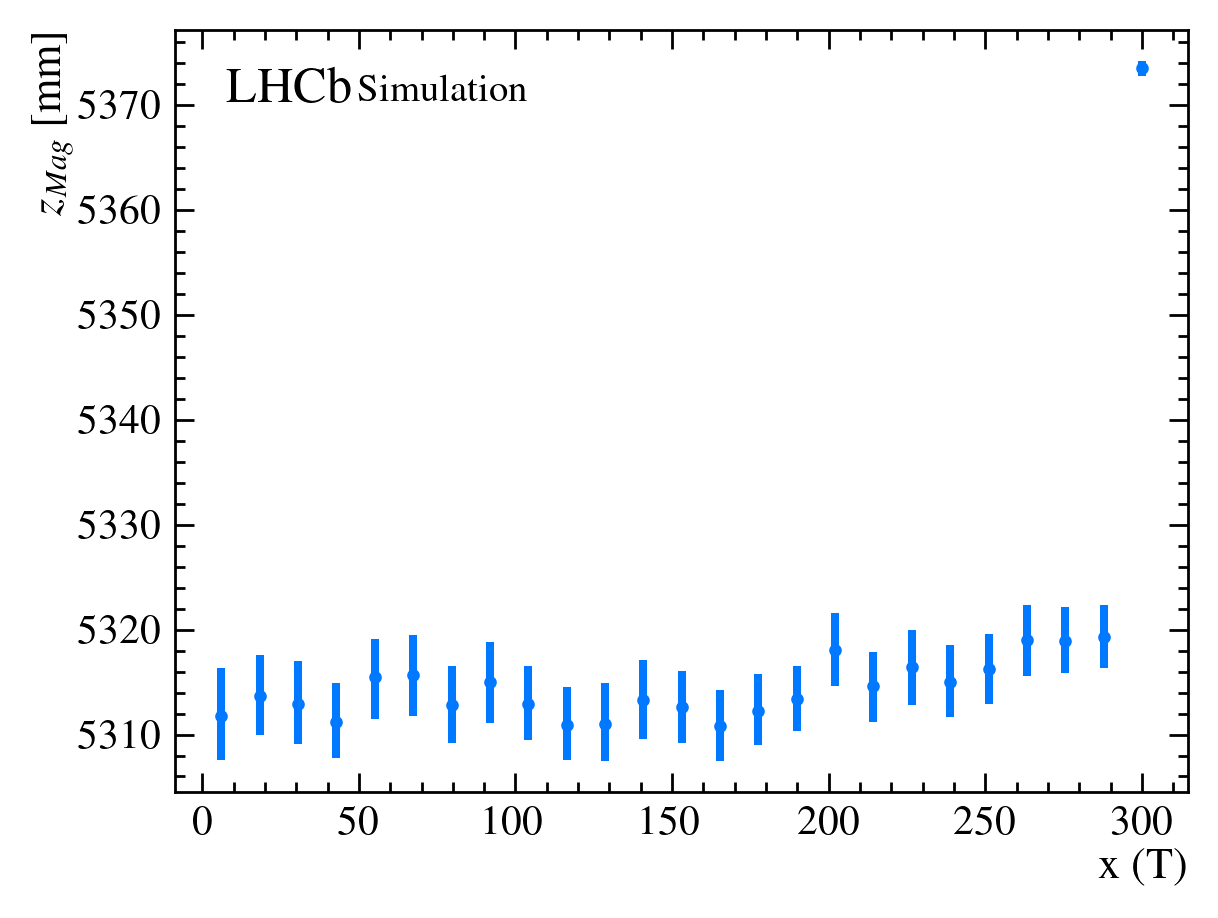

In [69]:
bins = np.linspace(-300, 300, 50)
sns.regplot(
    x=ak.to_numpy(sel_array["x_EndT_abs"]),
    y=ak.to_numpy(sel_array["z_mag_xEndT"]),
    x_bins=bins,
    fit_reg=None,
    x_estimator=np.mean,
)
plt.xlabel("x (T)")
plt.ylabel("$z_{Mag}$ [mm]")
mplhep.lhcb.text("Simulation")
plt.show()

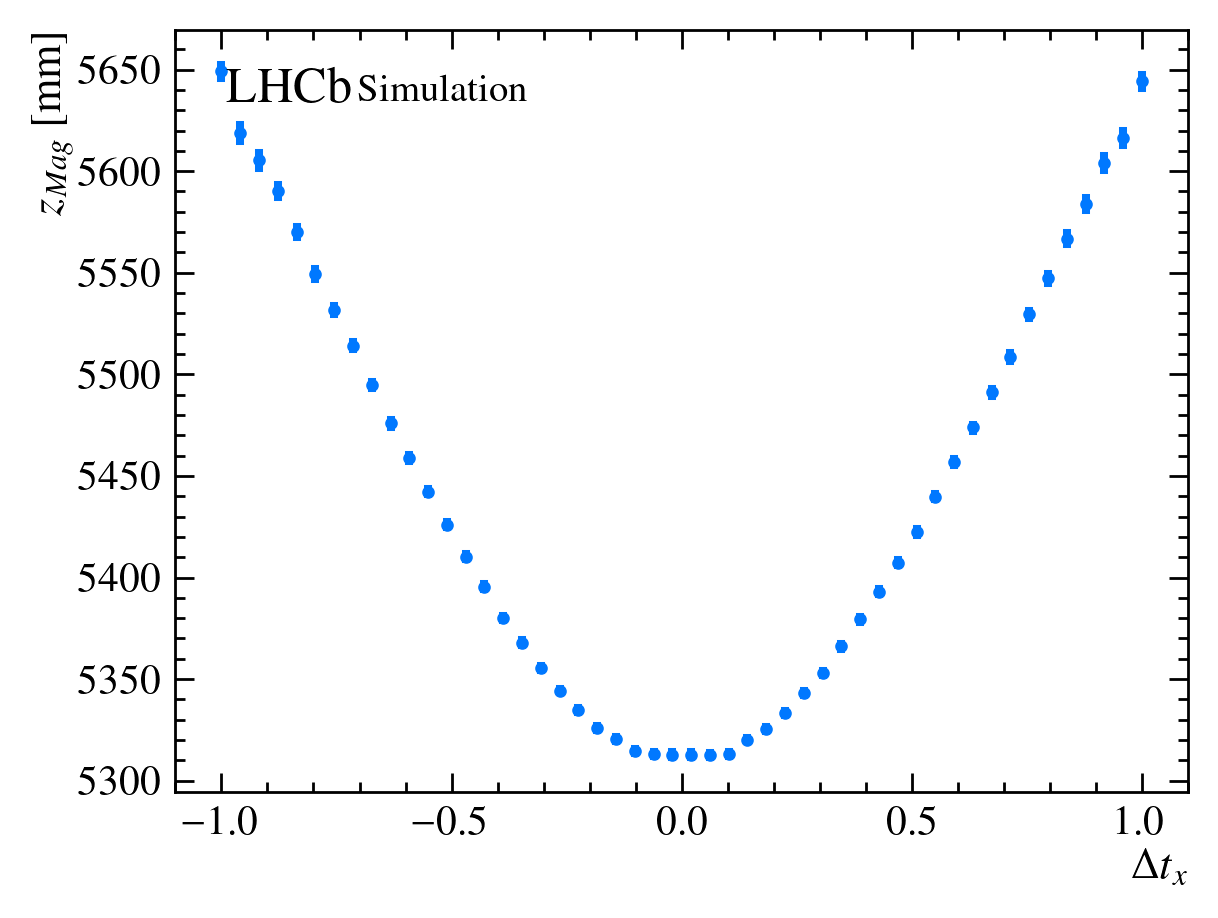

In [70]:
bins = np.linspace(-1.0, 1.0, 50)
sns.regplot(
    x=ak.to_numpy(sel_array["dSlope_xEndT"]),
    y=ak.to_numpy(sel_array["z_mag_xEndT"]),
    x_bins=bins,
    fit_reg=None,
    x_estimator=np.mean,
)
plt.xlabel("$\Delta t_x$")
plt.ylabel("$z_{Mag}$ [mm]")
mplhep.lhcb.text("Simulation")
plt.show()

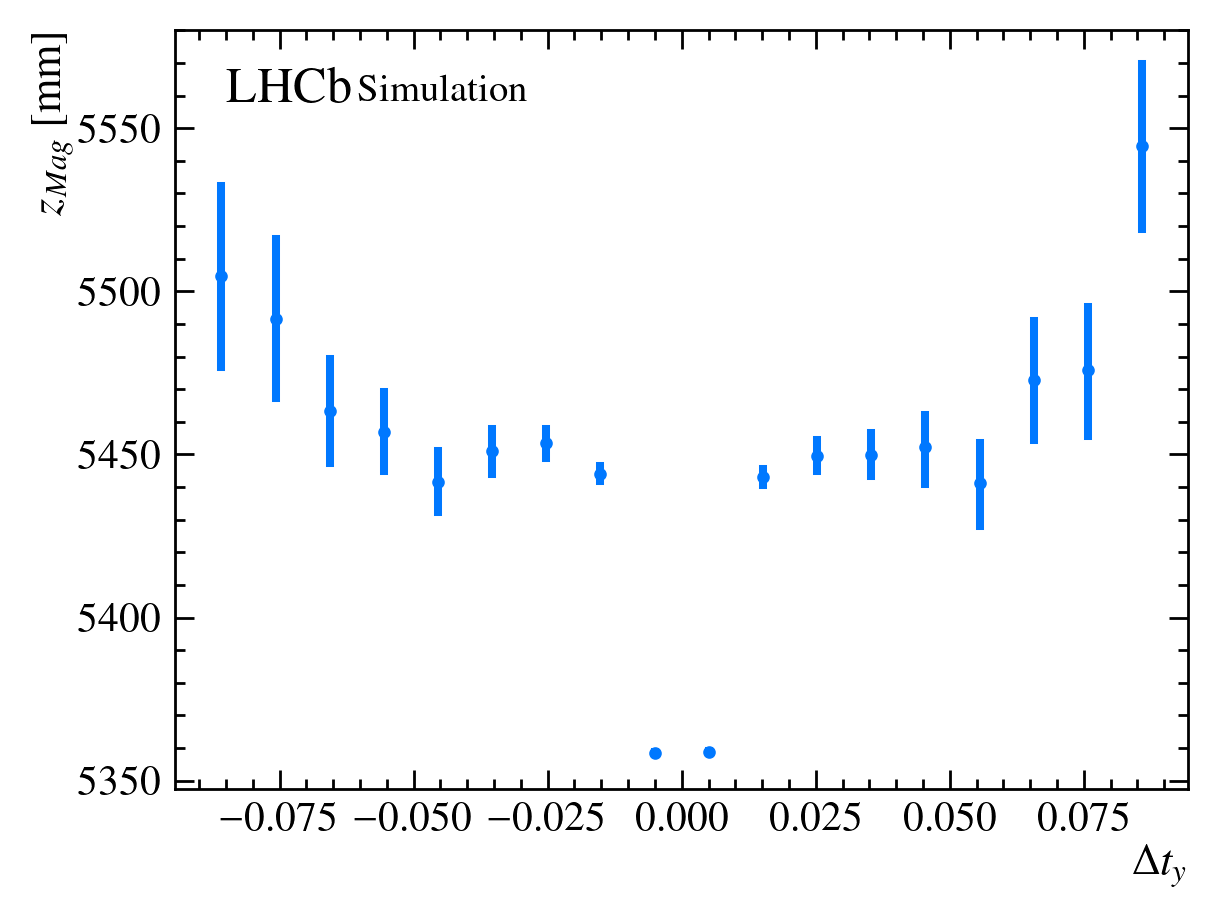

In [71]:
bins = np.linspace(-0.5, 0.5, 100)
sns.regplot(
    x=ak.to_numpy(sel_array["dSlope_yEndT"]),
    y=ak.to_numpy(sel_array["z_mag_xEndT"]),
    x_bins=bins,
    fit_reg=None,
    x_estimator=np.mean,
)
plt.xlabel("$\Delta t_y$")
plt.ylabel("$z_{Mag}$ [mm]")
mplhep.lhcb.text("Simulation")
plt.show()

In [79]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import numpy as np

features = [
    "ideal_state_770_tx",
    "dSlope_xEndT",
    "dSlope_xEndT_abs",
    "x_EndT_abs",
    # "dSlope_yEndT",
    # "dSlope_yEndT_abs",
    "ideal_state_770_ty",
    # "ideal_state_9410_ty",
    # "ideal_state_770_x",
    # "x_EndVelo_abs",
]

target_feat = "z_mag_xEndT"
order = 3

data = np.column_stack([ak.to_numpy(sel_array[feat]) for feat in features])
target = ak.to_numpy(sel_array[target_feat])
X_train, X_test, y_train, y_test = train_test_split(data,
                                                    target,
                                                    test_size=0.2,
                                                    random_state=42)

poly = PolynomialFeatures(degree=order, include_bias=False)
X_train_model = poly.fit_transform(X_train)
X_test_model = poly.fit_transform(X_test)

poly_features = poly.get_feature_names_out(input_features=features)

keep = [
    "ideal_state_770_tx",
    "dSlope_xEndT",
    "dSlope_xEndT_abs",  # keep
    "x_EndT_abs",  # keep
    "ideal_state_770_ty",
    "ideal_state_770_tx^2",
    "ideal_state_770_tx dSlope_xEndT",
    "ideal_state_770_tx dSlope_xEndT_abs",
    "ideal_state_770_tx x_EndT_abs",
    "ideal_state_770_tx ideal_state_770_ty",
    "dSlope_xEndT^2",  # keep
    "dSlope_xEndT dSlope_xEndT_abs",
    "dSlope_xEndT x_EndT_abs",
    "dSlope_xEndT ideal_state_770_ty",
    "dSlope_xEndT_abs^2",
    "dSlope_xEndT_abs x_EndT_abs",
    "dSlope_xEndT_abs ideal_state_770_ty",
    "x_EndT_abs^2",
    "x_EndT_abs ideal_state_770_ty",
    "ideal_state_770_ty^2",  # keep
    "ideal_state_770_tx^3",
    "ideal_state_770_tx^2 dSlope_xEndT",
    "ideal_state_770_tx^2 dSlope_xEndT_abs",
    "ideal_state_770_tx^2 x_EndT_abs",
    "ideal_state_770_tx^2 ideal_state_770_ty",
    "ideal_state_770_tx dSlope_xEndT dSlope_xEndT_abs",
    "ideal_state_770_tx dSlope_xEndT x_EndT_abs",
    "ideal_state_770_tx dSlope_xEndT ideal_state_770_ty",
    "ideal_state_770_tx dSlope_xEndT_abs^2",
    "ideal_state_770_tx dSlope_xEndT_abs x_EndT_abs",
    "ideal_state_770_tx dSlope_xEndT_abs ideal_state_770_ty",
    "ideal_state_770_tx x_EndT_abs^2",
    "ideal_state_770_tx x_EndT_abs ideal_state_770_ty",
    "ideal_state_770_tx ideal_state_770_ty^2",
    "dSlope_xEndT^3",
    "dSlope_xEndT^2 dSlope_xEndT_abs",
    "dSlope_xEndT^2 x_EndT_abs",
    "dSlope_xEndT^2 ideal_state_770_ty",
    "dSlope_xEndT dSlope_xEndT_abs^2",
    "dSlope_xEndT dSlope_xEndT_abs x_EndT_abs",
    "dSlope_xEndT dSlope_xEndT_abs ideal_state_770_ty",
    "dSlope_xEndT x_EndT_abs ideal_state_770_ty",
    "dSlope_xEndT ideal_state_770_ty^2",
    "dSlope_xEndT_abs^2 x_EndT_abs",
    "dSlope_xEndT_abs x_EndT_abs^2",
    "dSlope_xEndT_abs x_EndT_abs ideal_state_770_ty",
    "dSlope_xEndT_abs ideal_state_770_ty^2",
    "x_EndT_abs^3",
    "x_EndT_abs^2 ideal_state_770_ty",
    "x_EndT_abs ideal_state_770_ty^2",
]

# keep = [
#     "ideal_state_770_tx^2",
#     "dSlope_xEndT^2",
#     "dSlope_xEndT_abs",
#     "x_EndT_abs",
# ]
remove = [i for i, f in enumerate(poly_features) if f not in keep]

X_train_model = np.delete(X_train_model, remove, axis=1)
X_test_model = np.delete(X_test_model, remove, axis=1)
poly_features = np.delete(poly_features, remove)
# print(poly_features)

lin_reg = LinearRegression()
# lin_reg = Lasso(alpha=0.1)
# lin_reg = LassoCV(max_iter=2000)
# lin_reg = ElasticNet(alpha=0.1)
# lin_reg = Ridge(alpha=0)
lin_reg.fit(X_train_model, y_train)
y_pred_test = lin_reg.predict(X_test_model)
print("intercept=", lin_reg.intercept_)
print("coef=", dict(zip(poly_features, lin_reg.coef_)))
print("r2 score=", lin_reg.score(X_test_model, y_test))
print("RMSE =", mean_squared_error(y_test, y_pred_test, squared=False))

intercept= 5303.132333467949
coef= {'ideal_state_770_tx': -13.441950438394027, 'dSlope_xEndT': -4.369407701653064, 'dSlope_xEndT_abs': 230.37763264120008, 'x_EndT_abs': 0.026704166547390083, 'ideal_state_770_ty': -14.30702118941663, 'ideal_state_770_tx^2': 77928.66766333766, 'ideal_state_770_tx dSlope_xEndT': 69687.8060631645, 'ideal_state_770_tx dSlope_xEndT_abs': -86.35194840522867, 'ideal_state_770_tx x_EndT_abs': 0.00970580581706756, 'ideal_state_770_tx ideal_state_770_ty': -180.61816411073835, 'dSlope_xEndT^2': 7579.721527263535, 'dSlope_xEndT dSlope_xEndT_abs': -49.35311026671389, 'dSlope_xEndT x_EndT_abs': 0.015857700483615466, 'dSlope_xEndT ideal_state_770_ty': -35.74149120660231, 'dSlope_xEndT_abs^2': 7579.723402132595, 'dSlope_xEndT_abs x_EndT_abs': -0.22195273681292957, 'dSlope_xEndT_abs ideal_state_770_ty': 1.9491174288661794, 'x_EndT_abs^2': -0.0009034030507007965, 'x_EndT_abs ideal_state_770_ty': 0.0034286491846703187, 'ideal_state_770_ty^2': -2489.6827607187365, 'ideal_s

In [77]:
koeffs = dict(zip(poly_features, lin_reg.coef_))

remove = []
for itr in koeffs.items():
    if abs(itr[1]) < 1e-4:
        remove.append(itr[0])
remove

['ideal_state_770_tx x_EndT_abs^2',
 'dSlope_xEndT x_EndT_abs^2',
 'x_EndT_abs^3',
 'x_EndT_abs^2 ideal_state_770_ty']

In [ ]:
ls_koeffs = []
for itr in koeffs.items():
    ls_koeffs.append(itr[0])
ls_koeffs

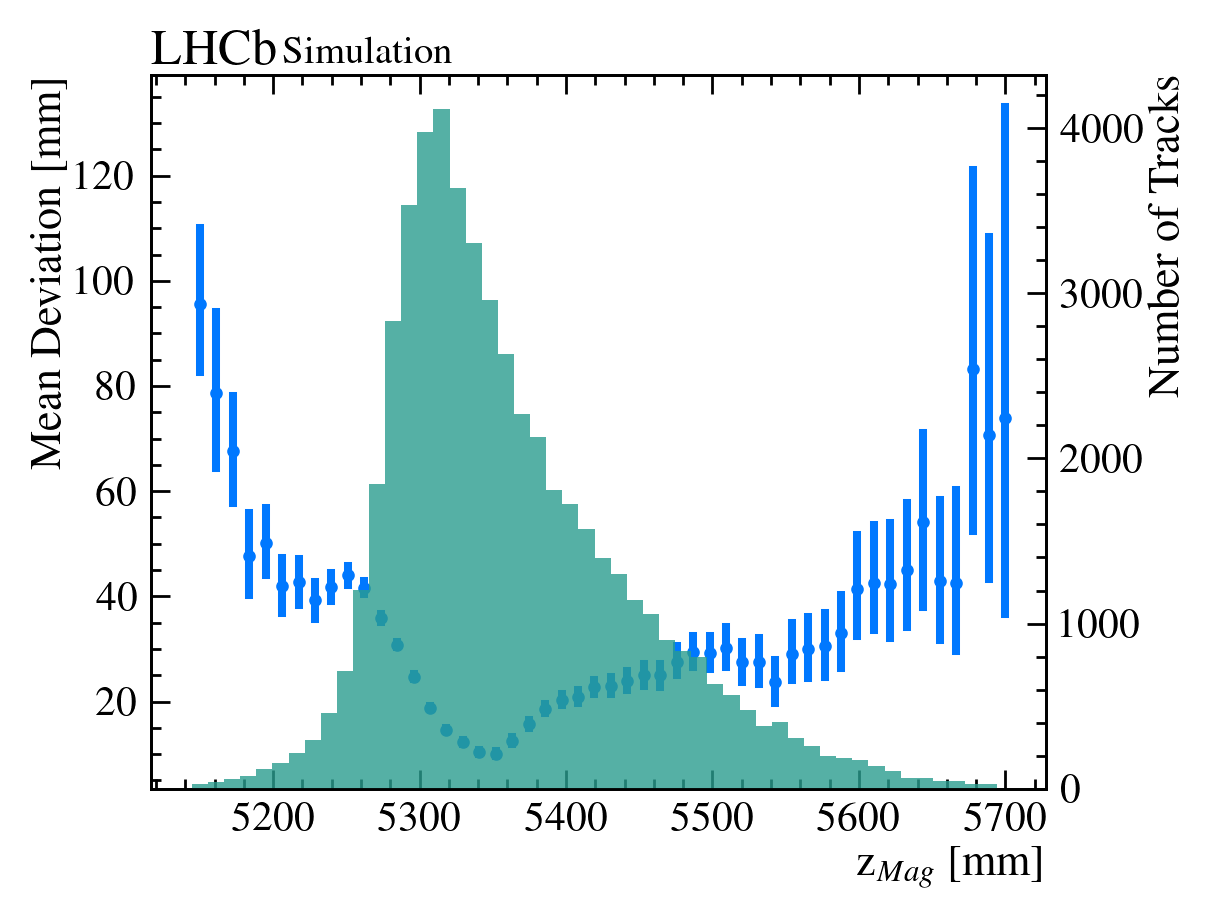

In [60]:
bins = np.linspace(5150, 5700, 50)
ax = sns.regplot(
    x=y_test,
    y=abs(y_test - y_pred_test),
    x_bins=bins,
    fit_reg=None,
    x_estimator=np.mean,
    label="bla",
)
ax2 = ax.twinx()
ax2.hist(y_test, bins=50, range=[5150, 5700], color="#2A9D8F", alpha=0.8, align="left")
ax.set_xlabel(r"z$_{Mag}$ [mm]")
ax.set_ylabel("Mean Deviation [mm]")
ax2.set_ylabel("Number of Tracks")
mplhep.lhcb.text("Simulation", loc=0)
plt.show()

In [ ]:
fig = plt.figure()
plt.hist(
    sel_array["z_mag_corr"],
    bins=100,
    # range=[5100, 5700],
    color="#2A9D8F",
    density=True,
)
plt.xlabel(r"z$_{Mag}$ correction [mm]")
plt.ylabel("Number of Tracks (normalised)")
mplhep.lhcb.text("Simulation")
plt.show()

In [ ]:
bins = np.linspace(-0.4, 0.4, 50)
sns.regplot(
    x=ak.to_numpy(sel_array["ideal_state_770_tx"]),
    y=ak.to_numpy(sel_array["z_mag_corr"]),
    x_bins=bins,
    fit_reg=None,
    x_estimator=np.mean,
)
# plt.ylim(5100, 5700)
plt.xlabel("dx/dz(VELO)")
plt.ylabel("$z_{Mag}$ correction [mm]")
mplhep.lhcb.text("Simulation")
plt.show()

In [ ]:
bins = np.linspace(-0.25, 0.25, 50)
sns.regplot(
    x=ak.to_numpy(sel_array["ideal_state_770_ty"]),
    y=ak.to_numpy(sel_array["z_mag_corr"]),
    x_bins=bins,
    fit_reg=None,
    x_estimator=np.mean,
)
# plt.ylim(4500, 5700)

plt.xlabel("dy/dz(VELO)")
plt.ylabel("$z_{Mag}$ correction [mm]")
mplhep.lhcb.text("Simulation")
plt.show()

In [ ]:
bins = np.linspace(-0.25, 0.25, 50)
sns.regplot(
    x=ak.to_numpy(sel_array["ideal_state_9410_ty"]),
    y=ak.to_numpy(sel_array["z_mag_corr"]),
    x_bins=bins,
    fit_reg=None,
    x_estimator=np.mean,
)
# plt.ylim(4500, 5700)

plt.xlabel("dy/dz(T)")
plt.ylabel("$z_{Mag}$ correction [mm]")
mplhep.lhcb.text("Simulation")
plt.show()

In [ ]:
bins = np.linspace(-300, 300, 50)
sns.regplot(
    x=ak.to_numpy(sel_array["ideal_state_770_x"]),
    y=ak.to_numpy(sel_array["z_mag_corr"]),
    x_bins=bins,
    fit_reg=None,
    x_estimator=np.mean,
)
plt.xlabel("x (VELO)")
plt.ylabel("$z_{Mag}$ correction [mm]")
mplhep.lhcb.text("Simulation")
plt.show()

In [ ]:
bins = np.linspace(0, 500, 50)
sns.regplot(
    # x=ak.to_numpy(sel_array["ideal_state_770_y"]),
    x=ak.to_numpy(sel_array["x_EndT_abs"]),
    y=ak.to_numpy(sel_array["z_mag_corr"]),
    x_bins=bins,
    fit_reg=None,
    x_estimator=np.mean,
)
plt.xlabel("x (T)")
plt.ylabel("$z_{Mag}$ correction [mm]")
mplhep.lhcb.text("Simulation")
plt.show()

In [ ]:
bins = np.linspace(0, 500, 50)
sns.regplot(
    # x=ak.to_numpy(sel_array["ideal_state_770_y"]),
    x=ak.to_numpy(sel_array["y_EndVelo_abs"]),
    y=ak.to_numpy(sel_array["z_mag_corr"]),
    x_bins=bins,
    fit_reg=None,
    x_estimator=np.mean,
)
plt.xlabel("y (VELO)")
plt.ylabel("$z_{Mag}$ correction [mm]")
mplhep.lhcb.text("Simulation")
plt.show()

In [ ]:
bins = np.linspace(0, 500, 50)
sns.regplot(
    # x=ak.to_numpy(sel_array["ideal_state_770_y"]),
    x=ak.to_numpy(sel_array["y_EndT_abs"]),
    y=ak.to_numpy(sel_array["z_mag_corr"]),
    x_bins=bins,
    fit_reg=None,
    x_estimator=np.mean,
)
plt.xlabel("y (T)")
plt.ylabel("$z_{Mag}$ correction [mm]")
mplhep.lhcb.text("Simulation")
plt.show()

In [ ]:
bins = np.linspace(-1.0, 1.0, 50)
sns.regplot(
    x=ak.to_numpy(sel_array["dSlope_xEndT"]),
    y=ak.to_numpy(sel_array["z_mag_corr"]),
    x_bins=bins,
    fit_reg=None,
    x_estimator=np.mean,
)
plt.xlabel("$\Delta t_x$")
plt.ylabel("$z_{Mag}$ correction [mm]")
mplhep.lhcb.text("Simulation")
plt.show()

In [ ]:
bins = np.linspace(-1.0, 1.0, 50)
sns.regplot(
    x=ak.to_numpy(sel_array["dSlope_yEndT_abs"]),
    y=ak.to_numpy(sel_array["z_mag_corr"]),
    x_bins=bins,
    fit_reg=None,
    x_estimator=np.mean,
)
plt.xlabel("$\Delta t_y$")
plt.ylabel("$z_{Mag}$ correction [mm]")
mplhep.lhcb.text("Simulation")
plt.show()

In [ ]:
features = [
    # # "ideal_state_770_tx",
    # "ideal_state_770_ty",
    # "ideal_state_9410_ty",
    # # "dSlope_yEndT",
    # # "dSlope_yEndT_abs",
    # # "ideal_state_770_x",
    # # "ideal_state_9410_x",
    # # "x_EndVelo_abs",
    # "y_EndVelo_abs",
    # # "y_EndT_abs",
    # "dSlope_xEndT",
    # "dSlope_xEndT_abs",
    # "x_EndT_abs",
    "ideal_state_770_tx",
    "ideal_state_770_ty",
    "ideal_state_9410_ty",
    "ideal_state_9410_tx",
    "dSlope_xEndT",
    "dSlope_xEndT_abs",
    "x_EndT_abs",
    "ideal_state_770_x",
    "x_EndVelo_abs",
]

target_feat = "z_mag_corr"
order = 4

data = np.column_stack([ak.to_numpy(sel_array[feat]) for feat in features])
target = ak.to_numpy(sel_array[target_feat])
X_train, X_test, y_train, y_test = train_test_split(data,
                                                    target,
                                                    test_size=0.1,
                                                    random_state=42)

poly = PolynomialFeatures(degree=order, include_bias=True)
X_train_model = poly.fit_transform(X_train)
X_test_model = poly.fit_transform(X_test)

poly_features = poly.get_feature_names_out(input_features=features)

# keep = [
#     "ideal_state_770_tx^2",
#     "ideal_state_770_x",
#     # "x_EndVelo_abs",
#     "dSlope_xEndT^2",
#     "dSlope_xEndT_abs",
#     "x_EndT_abs",
# ]
# remove = [i for i, f in enumerate(poly_features) if f not in keep]
# remove_term = [
#     "ideal_state_770_x^2 ideal_state_9410_x",
# ]
# remove = [i for i, f in enumerate(poly_features) if f in remove_term]

# X_train_model = np.delete(X_train_model, remove, axis=1)
# X_test_model = np.delete(X_test_model, remove, axis=1)
# poly_features = np.delete(poly_features, remove)
# print(poly_features)

# lin_reg = LinearRegression()
lin_reg = Lasso(alpha=0.1, max_iter=2000)
# lin_reg = LassoCV()
# lin_reg = ElasticNet(alpha=1)
# lin_reg = Ridge(alpha=1)
lin_reg.fit(X_train_model, y_train)
y_pred_test = lin_reg.predict(X_test_model)
print("intercept=", lin_reg.intercept_)
print("coef=", dict(zip(poly_features, lin_reg.coef_)))
print("r2 score=", lin_reg.score(X_test_model, y_test))
print("RMSE =", mean_squared_error(y_test, y_pred_test, squared=False))

In [ ]:
bins = np.linspace(-200, 200, 50)
ax = sns.regplot(
    x=y_test,
    y=abs(y_test - y_pred_test),
    x_bins=bins,
    fit_reg=None,
    x_estimator=np.mean,
    label="bla",
)
ax2 = ax.twinx()
ax2.hist(y_test,
         bins=30,
         range=[-200, 200],
         color="#2A9D8F",
         alpha=0.8,
         align="left")
ax.set_xlabel(r"z$_{Mag}$ correction [mm]")
ax.set_ylabel("Mean Deviation [mm]")
ax2.set_ylabel("Number of Tracks")
mplhep.lhcb.text("Simulation", loc=0)
plt.show()